In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import statsmodels.api as sm
from matplotlib.offsetbox import AnchoredText

In [2]:
sns.set_theme(color_codes=True)

In [3]:
#RGCode FullDS_ARGCODE_shearing0.2_valdicecoef_20210420_15-56-29_model_model_counts
#SegMod MN SEGMOD_New_ImageNet_shearing02_valdicecoef_20210420_17-13-57_model_model_counts
#SegMod RN SEGMOD_New_ResNet_ImageNet_shearing02_valdicecoef_20210420_20-09-12_model_model_counts
#SegMod RN trained on full data set SEGMOD_New_ResNet_ImageNet_FullDS_valdicecoef_20210422_11-25-16_model_model_counts
df = pd.read_csv('SEGMOD_New_MobileNet_MTT_20210424_16-39-14_model_model_counts.csv')
df.columns = ["Name", "Counter_1", "Mean Manual Counts", "Median", "Model Prediction"]

In [4]:
def get_condition(char):
    count = 0
    char = char
    a = 0
    b = 0
    for i in range(len(df["Name"])):
        if df["Name"][i].startswith(char):
            #print(df["Name"][i])
            count = count + 1
            if a == 0:
                b = i
                a = 1 
            else: 
                continue  
    if b == 0:
        dfx = df[b:b+count-1]
    else: 
        dfx = df[b:b+count]    
    return dfx

In [5]:
df2 = get_condition('2')
df4 = get_condition('4')
df8 = get_condition('8')
dfN = get_condition('N')
dfV = pd.concat([df, df2, df4, dfN]).drop_duplicates(keep=False)
#dfV = pd.concat([df, df2, df4, df8, dfN]).drop_duplicates(keep=False)

-0.05262807717897539 39.3727877578177 -0.04922496470972255 0.8235009773690857 0.23302130746105665


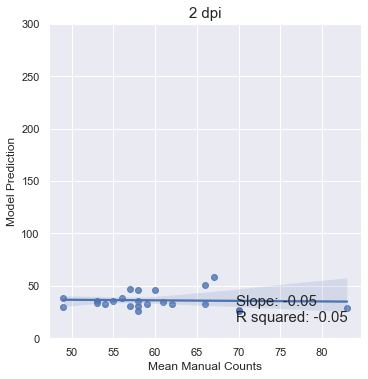

In [6]:
g =sns_plot = sns.lmplot(x="Mean Manual Counts", y="Model Prediction", data=df2, sharex=False, sharey=False)
g.set(ylim=(0, 300))
ax = plt.gca()
ax.set_title("2 dpi", fontsize=15)
#sns_plot.savefig("2dpi.png")
slope, intercept, r, p, se = scipy.stats.linregress(df2["Mean Manual Counts"], df2["Model Prediction"])
at = AnchoredText("Slope: {:.2f} \nR squared: {:.2f}".format(slope,r),
                  prop=dict(size=15), frameon=False,
                  loc='lower right')
ax.add_artist(at)
print(slope, intercept, r, p, se)

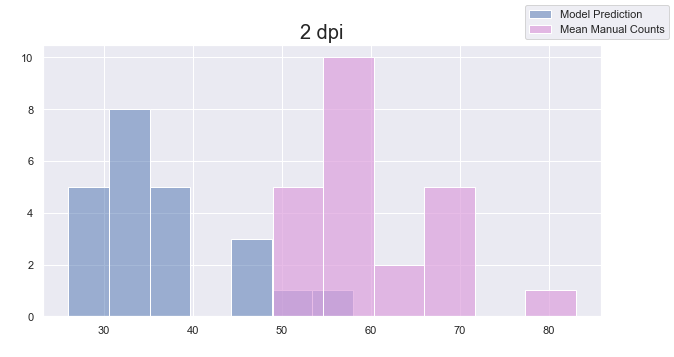

In [7]:
fig = plt.figure(figsize=(10,5))
sns_plot = sns.histplot(df2['Model Prediction'], kde = False, alpha=0.5)
sns_plot = sns.histplot(df2['Mean Manual Counts'], color='plum', kde = False, alpha=0.7)
ax = plt.gca()
ax.set(xlabel=" ", ylabel= " ")
ax.set_title("2 dpi", fontsize=20)
fig.legend(labels=['Model Prediction','Mean Manual Counts'])

0.751561701444154 16.579323335718357 0.34079214404548863 0.056301904074949734 0.3785352727568834


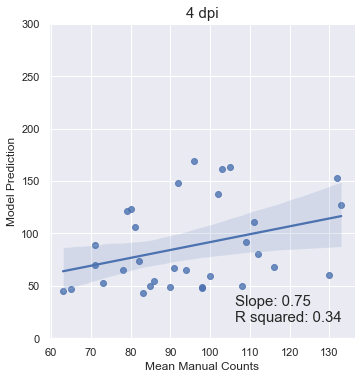

In [8]:
g =sns_plot = sns.lmplot(x="Mean Manual Counts", y="Model Prediction", data=df4, sharex=False, sharey=False)
g.set(ylim=(0, 300))
ax = plt.gca()
ax.set_title("4 dpi", fontsize=15)
#sns.lmplot(x="Mean", y="Model", data=df, x_estimator=np.mean)
slope, intercept, r, p, se = scipy.stats.linregress(df4["Mean Manual Counts"], df4["Model Prediction"])
at = AnchoredText("Slope: {:.2f} \nR squared: {:.2f}".format(slope,r),
                  prop=dict(size=15), frameon=False,
                  loc='lower right')
ax.add_artist(at)
print(slope, intercept, r, p, se)

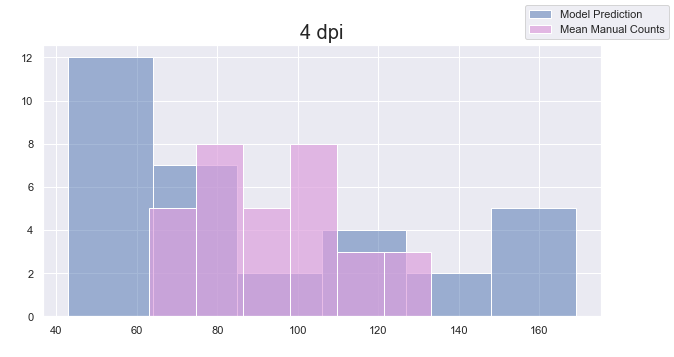

In [9]:
fig = plt.figure(figsize=(10,5))
sns.histplot(df4['Model Prediction'], kde = False, alpha=0.5)
sns.histplot(df4['Mean Manual Counts'], color='plum', kde = False, alpha=0.7)
ax = plt.gca()
ax.set(xlabel=" ", ylabel= " ")
ax.set_title("4 dpi", fontsize=20)
fig.legend(labels=['Model Prediction','Mean Manual Counts'])

0.9898274296094459 10.96739327883742 0.9622078162204618 0.00013114574155664212 0.11436377266697804


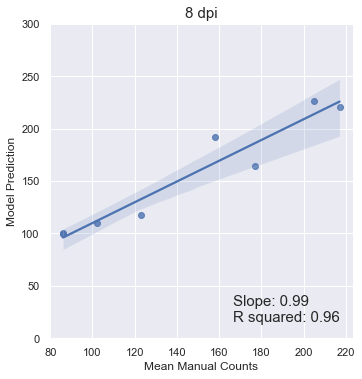

In [10]:
g =sns_plot = sns.lmplot(x="Mean Manual Counts", y="Model Prediction", data=df8, sharex=False, sharey=False)
g.set(ylim=(0, 300))
ax = plt.gca()
ax.set_title("8 dpi", fontsize=15)
slope, intercept, r, p, se = scipy.stats.linregress(df8["Mean Manual Counts"], df8["Model Prediction"])
at = AnchoredText("Slope: {:.2f} \nR squared: {:.2f}".format(slope,r),
                  prop=dict(size=15), frameon=False,
                  loc='lower right')
ax.add_artist(at)
print(slope, intercept, r, p, se)

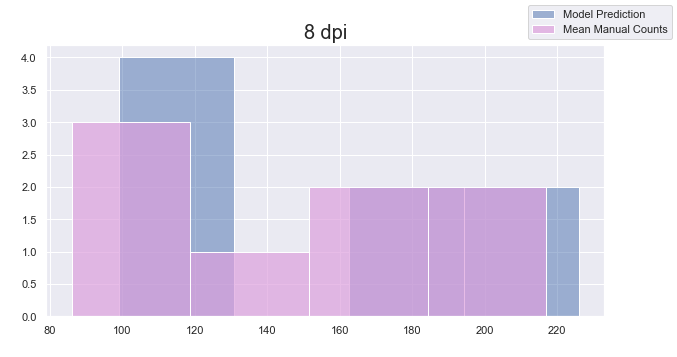

In [11]:
fig = plt.figure(figsize=(10,5))
sns.histplot(df8['Model Prediction'], kde = False, alpha=0.5)
sns.histplot(df8['Mean Manual Counts'], color='plum', kde = False, alpha=0.7)
ax = plt.gca()
ax.set(xlabel=" ", ylabel= " ")
ax.set_title("8 dpi", fontsize=20)
fig.legend(labels=['Model Prediction','Mean Manual Counts'])

0.5143324895026453 33.15363276690565 0.5685275304650474 2.491180225478335e-05 0.10973272423945372


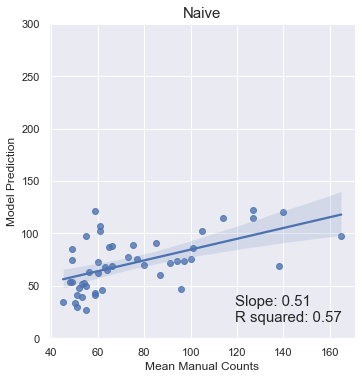

In [12]:
g =sns_plot = sns.lmplot(x="Mean Manual Counts", y="Model Prediction", data=dfN, sharex=False, sharey=False)
g.set(ylim=(0, 300))
ax = plt.gca()
ax.set_title("Naive", fontsize=15)
slope, intercept, r, p, se = scipy.stats.linregress(dfN["Mean Manual Counts"], dfN["Model Prediction"])
at = AnchoredText("Slope: {:.2f} \nR squared: {:.2f}".format(slope,r),
                  prop=dict(size=15), frameon=False,
                  loc='lower right')
ax.add_artist(at)
print(slope, intercept, r, p, se)

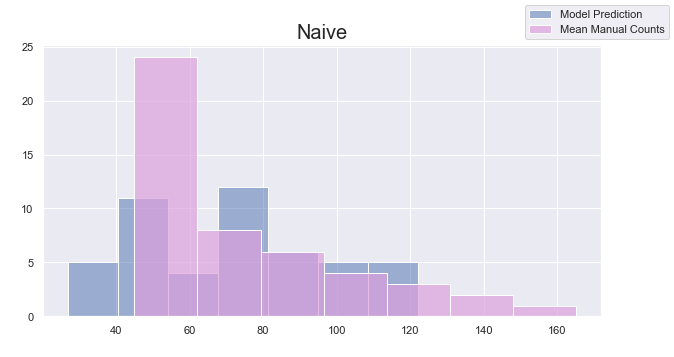

In [13]:
fig = plt.figure(figsize=(10,5))
sns.histplot(dfN['Model Prediction'], kde = False, alpha=0.5)
sns.histplot(dfN['Mean Manual Counts'], color='plum', kde = False, alpha=0.7)
ax = plt.gca()
ax.set(xlabel=" ", ylabel= " ")
ax.set_title("Naive", fontsize=20)
fig.legend(labels=['Model Prediction','Mean Manual Counts'])

1.1022069840179243 -23.799344340213594 0.9157862911040464 1.986331043996079e-15 0.08171465027102141


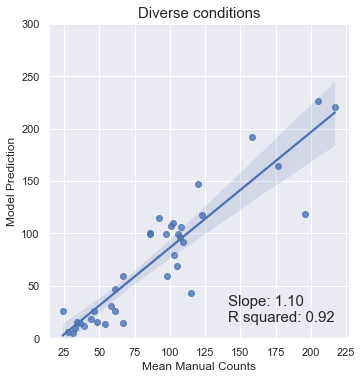

In [14]:
g =sns_plot = sns.lmplot(x="Mean Manual Counts", y="Model Prediction", data=dfV, sharex=False, sharey=False)
g.set(ylim=(0, 300))
ax = plt.gca()
ax.set_title("Diverse conditions", fontsize=15)
slope, intercept, r, p, se = scipy.stats.linregress(dfV["Mean Manual Counts"], dfV["Model Prediction"])
at = AnchoredText("Slope: {:.2f} \nR squared: {:.2f}".format(slope,r),
                  prop=dict(size=15), frameon=False,
                  loc='lower right')
ax.add_artist(at)
print(slope, intercept, r, p, se)

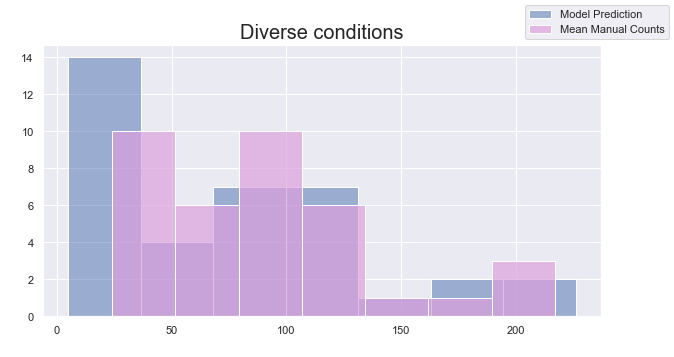

In [15]:
fig = plt.figure(figsize=(10,5))
sns.histplot(dfV['Model Prediction'], kde = False, alpha=0.5)
sns.histplot(dfV['Mean Manual Counts'], color='plum', kde = False, alpha=0.7)
ax = plt.gca()
ax.set(xlabel=" ", ylabel= " ")
ax.set_title("Diverse conditions", fontsize=20)
fig.legend(labels=['Model Prediction','Mean Manual Counts'])

0.9458407405137005 -6.055957124466872 0.7558458272507773 3.705691880265118e-27 0.06974619489136998


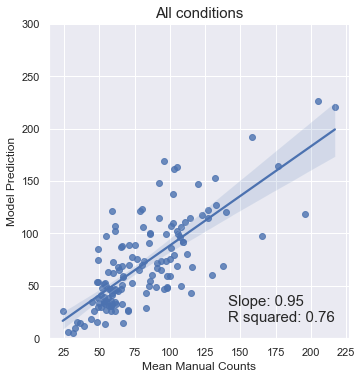

In [16]:
g = sns.lmplot(x="Mean Manual Counts", y="Model Prediction", data=df, sharex=False, sharey=False)
g.set(ylim=(0, 300))
ax = plt.gca()
ax.set_title("All conditions", fontsize=15)
slope, intercept, r, p, se = scipy.stats.linregress(df["Mean Manual Counts"], df["Model Prediction"])
at = AnchoredText("Slope: {:.2f} \nR squared: {:.2f}".format(slope,r),
                  prop=dict(size=15), frameon=False,
                  loc='lower right')
ax.add_artist(at)
print(slope, intercept, r, p, se)

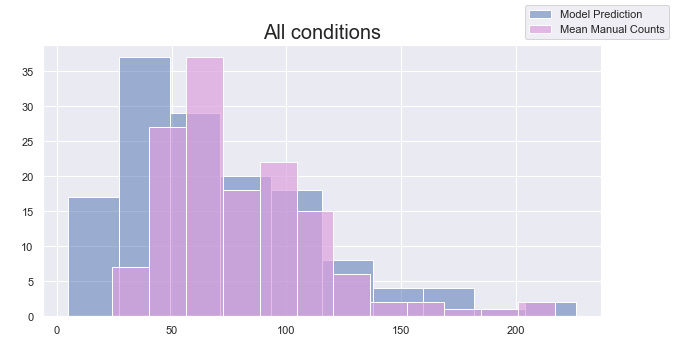

In [17]:
fig = plt.figure(figsize=(10,5))
sns.histplot(df['Model Prediction'], kde = False, alpha=0.5)
sns.histplot(df['Mean Manual Counts'], color='plum', kde = False, alpha=0.7)
ax = plt.gca()
ax.set(xlabel=" ", ylabel= " ")
ax.set_title("All conditions", fontsize=20)
fig.legend(labels=['Model Prediction','Mean Manual Counts'])

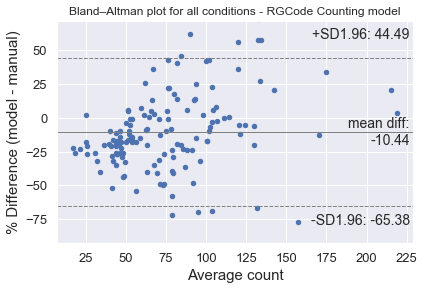

In [18]:
#####  Bland–Altman analysis
f, ax = plt.subplots()
sm.graphics.mean_diff_plot(df['Model Prediction'], df['Mean Manual Counts'], sd_limit=1.96, ax=ax)
ax.set_title('Bland–Altman plot for all conditions - RGCode Counting model')
ax.set_xlabel('Average count')
ax.set_ylabel('% Difference (model - manual)')
#plt.savefig('Bland–Altman.png')
plt.show()